In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv("random_data.csv")
soundpath = "../sound_split/sounds/"
mfcc = 40

In [13]:
def features_extractor(filename):
    audio, sample_rate = librosa.load(soundpath+filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=mfcc)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [63]:
azerice_min,azerice_max=[],[]
kazakca_min,kazakca_max=[],[]
kirgizca_min,kirgizca_max=[],[]
ozbekce_min,ozbekce_max=[],[]
tatarca_min,tatarca_max=[],[]
turkmence_min,turkmence_max=[],[]
uygurca_min,uygurca_max=[],[]
azerbaycan_file = ""
kazakca_file = ""
kirgizca_file = ""
ozbekce_file = ""
tatarca_file = ""
turkmence_file = ""
uygurca_file = ""
for i in range(len(data)):
    arr = features_extractor(data["file_name"][i])
    if data["class_name"][i] == "azerbaycan":
        azerice_min.append(arr.min())
        azerice_max.append(arr.max())
        azerbaycan_file = data["file_name"][i]
    elif data["class_name"][i] == "kazakca":
        kazakca_min.append(arr.min())
        kazakca_max.append(arr.max())
        kazakca_file = data["file_name"][i]
    elif data["class_name"][i] == "kirgizca":
        kirgizca_min.append(arr.min())
        kirgizca_max.append(arr.max())
        kirgizca_file = data["file_name"][i]
    elif data["class_name"][i] == "ozbekce":
        ozbekce_min.append(arr.min())
        ozbekce_max.append(arr.max())
        ozbekce_file = data["file_name"][i]
    elif data["class_name"][i] == "tatarca":
        tatarca_min.append(arr.min())
        tatarca_max.append(arr.max())
        tatarca_file = data["file_name"][i]
    elif data["class_name"][i] == "turkmence":
        turkmence_min.append(arr.min())
        turkmence_max.append(arr.max())
        turkmence_file = data["file_name"][i]
    elif data["class_name"][i] == "uygurca":
        uygurca_min.append(arr.min())
        uygurca_max.append(arr.max())
        uygurca_file = data["file_name"][i]

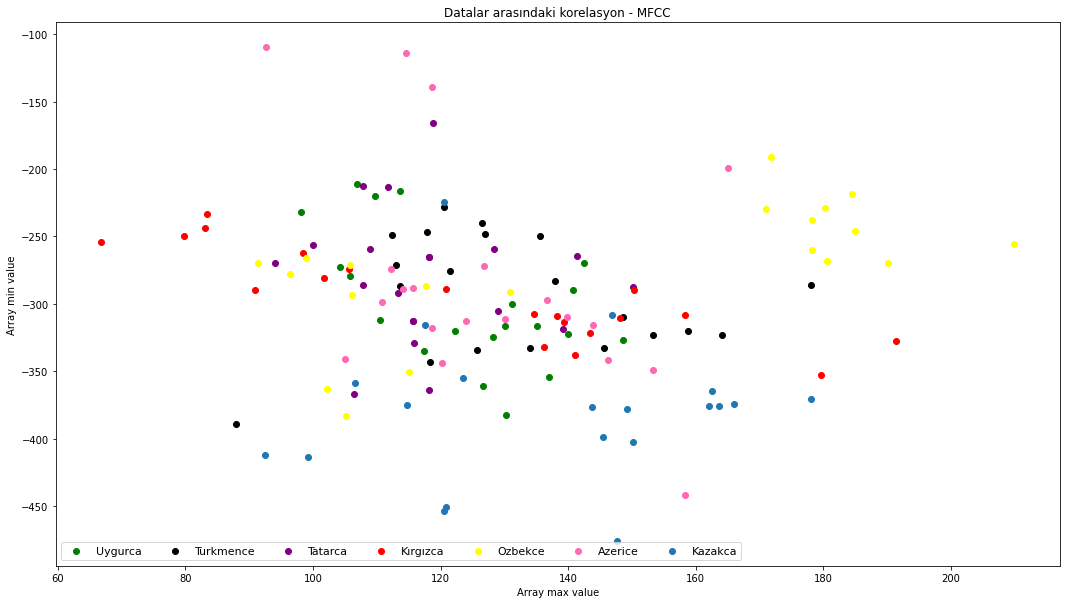

In [71]:
plt.figure(figsize=(18, 10))
a = plt.scatter(uygurca_max,uygurca_min,color = 'green')
b = plt.scatter(turkmence_max,turkmence_min,color = 'black')
c = plt.scatter(tatarca_max,tatarca_min,color = 'purple')
d = plt.scatter(kirgizca_max,kirgizca_min,color = 'red')
e = plt.scatter(ozbekce_max,ozbekce_min,color = 'yellow')
f = plt.scatter(azerice_max,azerice_min,color = 'hotpink')
g = plt.scatter(kazakca_max,kazakca_min)
plt.legend((a, b, c, d, e, f, g),
           ('Uygurca', 'Turkmence', 'Tatarca', 'Kırgızca', 'Ozbekce', 'Azerice', 'Kazakca'),
           scatterpoints=1,
           loc='lower left',
           ncol=7,
           fontsize=11)
plt.xlabel("Array max value")
plt.ylabel("Array min value")
plt.title("Datalar arasındaki korelasyon - MFCC")
plt.show()

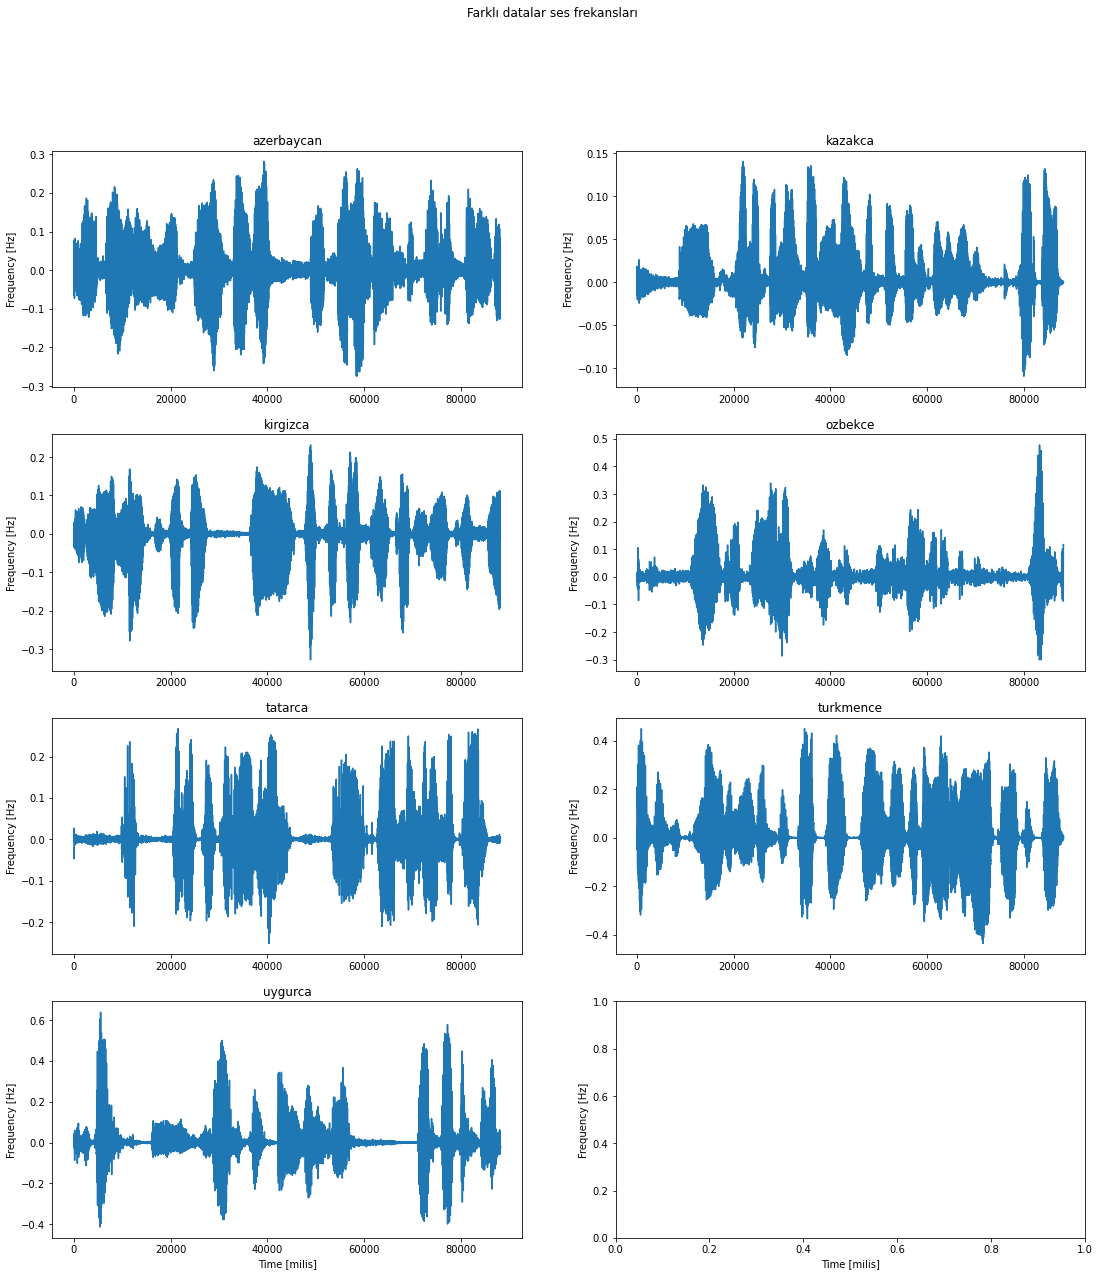

In [72]:
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(18.5, 20)
fig.suptitle('Farklı datalar ses frekansları')

azerbaycan,sample_rate = librosa.load(soundpath+azerbaycan_file, res_type='kaiser_fast')
ax[0,0].plot(azerbaycan)
ax[0,0].set_title('azerbaycan')
ax[0,0].set(ylabel="Frequency [Hz]")

kazakca,sample_rate = librosa.load(soundpath+kazakca_file, res_type='kaiser_fast')
ax[0,1].plot(kazakca)
ax[0,1].set_title('kazakca')
ax[0,1].set(ylabel="Frequency [Hz]")

kirgizca,sample_rate = librosa.load(soundpath+kirgizca_file, res_type='kaiser_fast')
ax[1,0].plot(kirgizca)
ax[1,0].set_title('kirgizca')
ax[1,0].set(ylabel="Frequency [Hz]")

ozbekce,sample_rate = librosa.load(soundpath+ozbekce_file, res_type='kaiser_fast')
ax[1,1].plot(ozbekce)
ax[1,1].set_title('ozbekce')
ax[1,1].set(ylabel="Frequency [Hz]")

tatarca,statarcaample_rate = librosa.load(soundpath+tatarca_file, res_type='kaiser_fast')
ax[2,0].plot(tatarca)
ax[2,0].set_title('tatarca')
ax[2,0].set(ylabel="Frequency [Hz]")

turkmence,statarcaample_rate = librosa.load(soundpath+turkmence_file, res_type='kaiser_fast')
ax[2,1].plot(turkmence)
ax[2,1].set_title('turkmence')
ax[2,1].set(ylabel="Frequency [Hz]")

uygurca,statarcaample_rate = librosa.load(soundpath+uygurca_file, res_type='kaiser_fast')
ax[3,0].plot(uygurca)
ax[3,0].set_title('uygurca')
ax[3,0].set(xlabel="Time [milis]",ylabel="Frequency [Hz]")

ax[3,1].set(xlabel="Time [milis]",ylabel="Frequency [Hz]")
plt.show()